In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
np.random.seed(69)

In [28]:
num_samples = 10_000
X = np.arange(0, num_samples)
X_ = np.arange(1, num_samples+1, 1_000)

def analyze_sample(Y):  
    """Returns all relevant stats for a sample Y."""
    n = len(Y)
  
    # 3-4) Cumulative average and standard error
    cum_avg = [np.mean(Y[:i]) for i in range(1, n+1)]
    cum_SE = [np.std(Y[:i]) / np.sqrt(i) for i in range(1, n+1)]

    # 5) mean and median
    mean, median = np.mean(Y), np.median(Y)
    
    # 7) Cumulative median
    cum_med = [np.median(Y[:i]) for i in range(1, n+1)]

    return cum_avg, cum_SE, cum_med, mean, median

def plot_cum_mean_median(cum_avg, cum_SE, cum_med, mean, median):
    """Plots the cumulative average, standard error, and median of a sample Y."""
    plt.title('Cumulative Average of Lognormal Distribution')
    plt.xlabel('Sample Size'); plt.ylabel('Average')
    plt.plot(X, cum_avg, label='Cumulative average')
    return
    cum_avg = [cum_avg[x] for x in X_]  # Error bars - Only plot every 1000th point for ease of viewing
    cum_SE = [cum_SE[x] for x in X_]
    print(len(X), len(X_))
    return
    plt.errorbar(X_, cum_avg, yerr=cum_SE, fmt='o', capsize=3, label='Standard error')
    plt.axhline(mean, color='r', label='Mean')
    plt.legend()
    plt.show()

    # 7) Plot cumulative median
    plt.title('Cumulative Median of Lognormal Distribution')
    plt.xlabel('Sample Size'); plt.ylabel('Median')
    plt.plot(X, cum_med, label='Cumulative median')
    plt.axhline(median, color='r', label='Mean')
    plt.legend()
    plt.show()

# Exercise 3: Law of large numbers
## Normal distribution

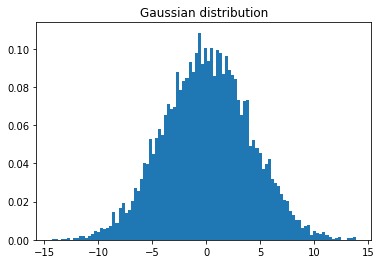

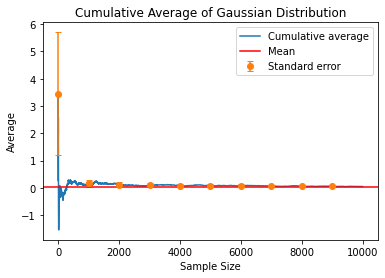

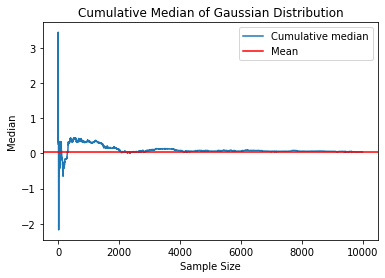

ValueError: x and y must have same first dimension, but have shapes (10000,) and (10,)

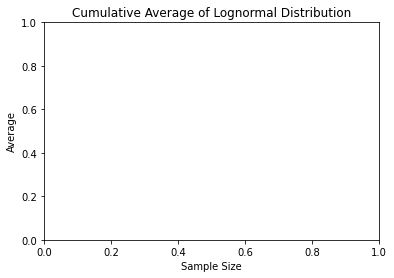

In [30]:
# 1) Gaussian sampling
mu, sigma = 0, 4
Y = np.random.standard_normal(num_samples) * sigma + mu
cum_avg, cum_SE, cum_med, mean, median = analyze_sample(Y)

# 2) Plot distribution
plt.hist(Y, bins=100, density=True)
plt.title('Gaussian distribution')
plt.show()

# 6) Plot cumulative average and standard error
plt.title('Cumulative Average of Gaussian Distribution')
plt.xlabel('Sample Size'); plt.ylabel('Average')
# X = np.arange(0, num_samples)
plt.plot(X, cum_avg, label='Cumulative average')

# X_ = np.arange(1, num_samples+1, 1_000)  # Error bar - Only plot every 1000th point for ease of viewing
cum_avg = [cum_avg[x] for x in X_]
cum_SE = [cum_SE[x] for x in X_]
plt.errorbar(X_, cum_avg, yerr=cum_SE, fmt='o', capsize=3, label='Standard error')
plt.axhline(mean, color='r', label='Mean')
plt.legend()
plt.show()

# 8) Plot cumulative median and distribution median
plt.title('Cumulative Median of Gaussian Distribution')
plt.xlabel('Sample Size'); plt.ylabel('Median')
plt.plot(X, cum_med, label='Cumulative median')
plt.axhline(median, color='r', label='Mean')
plt.legend()
plt.show()

plot_cum_mean_median(cum_avg, cum_SE, cum_med, mean, median)

## Pareto distribution

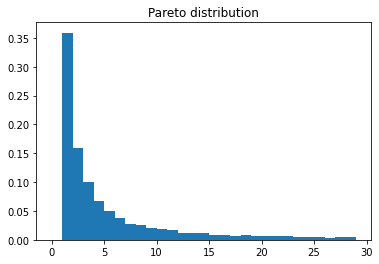

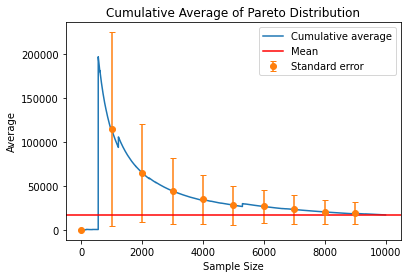

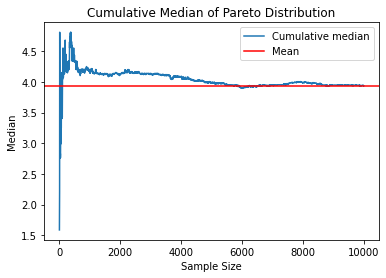

In [18]:
# 9) Pareto sampling
x_m = 1 # scale x_m/m parameter
alpha = 0.5 # shape alpha/a parameter
Y = (np.random.pareto(alpha, num_samples) + 1) * x_m
cum_avg, cum_SE, cum_med, mean, median = analyze_sample(Y)

# 2) Plot distribution
plt.hist(Y, bins=np.arange(0, 30, 1), density=True)
plt.title('Pareto distribution')
plt.show()

# 6) Plot cumulative average
plt.title('Cumulative Average of Pareto Distribution')
plt.xlabel('Sample Size'); plt.ylabel('Average')
plt.plot(X, cum_avg, label='Cumulative average')  # LEARNING MOMENT max(cum_avg) return 300000, which afterwards drops towards zero

cum_avg = [cum_avg[x] for x in X_]  # Error bars
cum_SE = [cum_SE[x] for x in X_]
plt.errorbar(X_, cum_avg, yerr=cum_SE, fmt='o', capsize=3, label='Standard error')
plt.axhline(mean, color='r', label='Mean')
plt.legend()
plt.show()

# 7) Plot cumulative median
plt.title('Cumulative Median of Pareto Distribution')
plt.xlabel('Sample Size'); plt.ylabel('Median')
plt.plot(X, cum_med, label='Cumulative median')
plt.axhline(median, color='r', label='Mean')
plt.legend()
plt.show()

## Lognormal Distribution

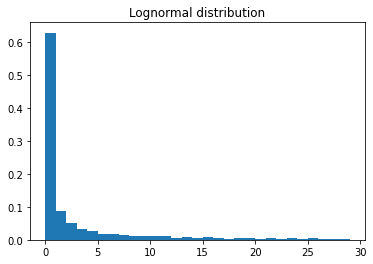

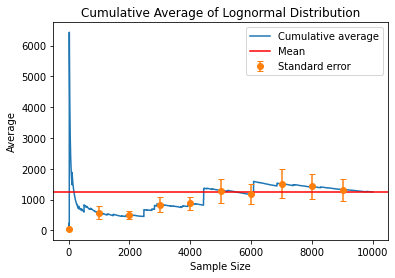

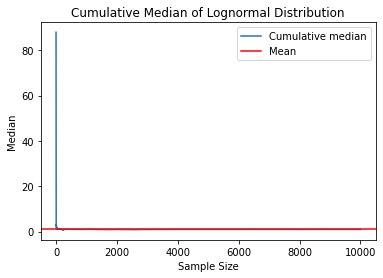

In [20]:
# 11) Pareto sampling by inverse transform sampling of uniform distribution
mu = 0 
sigma = 4 
Y = np.exp(np.random.standard_normal(num_samples) * sigma + mu)
cum_avg, cum_SE, cum_med, mean, median = analyze_sample(Y)

# 2) Plot distribution
plt.hist(Y, bins=np.arange(0, 30, 1), density=True)
plt.title('Lognormal distribution')
plt.show()

# 6) Plot cumulative average
plt.title('Cumulative Average of Lognormal Distribution')
plt.xlabel('Sample Size'); plt.ylabel('Average')
plt.plot(X, cum_avg, label='Cumulative average')

cum_avg = [cum_avg[x] for x in X_]  # Error bars
cum_SE = [cum_SE[x] for x in X_]
plt.errorbar(X_, cum_avg, yerr=cum_SE, fmt='o', capsize=3, label='Standard error')
plt.axhline(mean, color='r', label='Mean')
plt.legend()
plt.show()

# 7) Plot cumulative median
plt.title('Cumulative Median of Lognormal Distribution')
plt.xlabel('Sample Size'); plt.ylabel('Median')
plt.plot(X, cum_med, label='Cumulative median')
plt.axhline(median, color='r', label='Mean')
plt.legend()
plt.show()

## Citations from 2019

In [22]:
import pickle, random, pandas as pd

data = pd.read_pickle(r'C:\Users\Jason\Downloads\paperDataSet.pkl')
citation_count = list(data['papersCitationCount'].values)

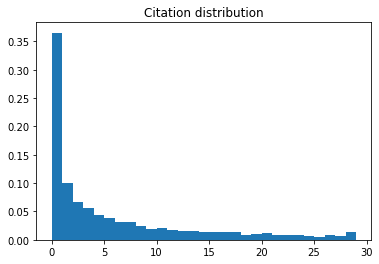

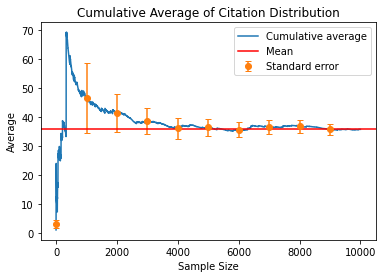

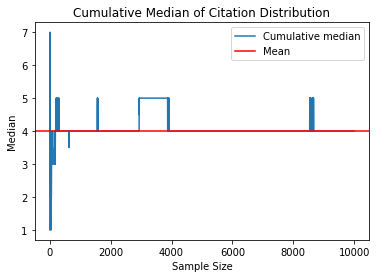

In [64]:
Y = random.sample(citation_count, num_samples)
cum_avg, cum_SE, cum_med, mean, median = analyze_sample(Y)

# 2) Plot distribution
plt.hist(Y, bins=np.arange(0, 30, 1), density=True)
plt.title('Citation distribution')
plt.show()

# 6) Plot cumulative average
plt.title('Cumulative Average of Citation Distribution')
plt.xlabel('Sample Size'); plt.ylabel('Average')
plt.plot(X, cum_avg, label='Cumulative average')

cum_avg = [cum_avg[x] for x in X_]  # Error bars
cum_SE = [cum_SE[x] for x in X_]
plt.errorbar(X_, cum_avg, yerr=cum_SE, fmt='o', capsize=3, label='Standard error')
plt.axhline(mean, color='r', label='Mean')
plt.legend()
plt.show()

# 7) Plot cumulative median
plt.title('Cumulative Median of Citation Distribution')
plt.xlabel('Sample Size'); plt.ylabel('Median')
plt.plot(X, cum_med, label='Cumulative median')
plt.axhline(median, color='r', label='Mean')
plt.legend()
plt.show()

Compare the evolution of the cumulative average for the Gaussian, Pareto and LogNormal distribution. What do you observe? Would you expect these results? Why?
- Normal central limit theorem, Pareto has crazy outliers, 

Compare the cumulative median vs the cumulative average for the three distributions. What do you observe? Can you draw any conclusions regarding which statistics (the mean or the median) is more usfeul in the different cases?
- In general median is more robust to outliers. Thus, median is most usefull in heavy tailed distributions. 
Consider the plots you made using the citation count data in point 14. What do you observe? What are the implications?

What do you think are the main take-home message of this exercise?
- Papers citations are apparently heavy tailed. Heavy tailed distributions are not well represented by the mean, and thus median is more usefull. 